In [84]:
import numpy as np

In [111]:
input_size = 3
layers = [4,3]
output_size = 2

In [112]:
class NeuralNetwroks:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model ={}
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        self.model=model
        self.activation_outputs=[]
        
    def softmax(self,v):
        return(np.exp(v)/np.sum(np.exp(v), axis=1, keepdims=True))
    
    def forward_propagation(self,x):
        z1 = np.dot(x,self.model['W1']) + self.model['b1']
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,self.model['W2']) + self.model['b2']
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,self.model['W3']) + self.model['b3']
        y_ = self.softmax(z3)
        
        self.activation_outputs = [a1,a2,y_]
        return (y_)
    
    def backward_propagation(self,x,y,lr=0.001):
        w1,w2,w3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activation_outputs
        m = x.shape[0]
        
        del3 = (y_ - y)
        dw3 = np.dot(a2.T , del3)
        db3 = np.sum(del3 , axis = 0)/m
        
        del2 = (1-np.square(a2))*np.dot(del3,w3.T)
        dw2 = np.dot(a1.T , del2)
        db2 = np.sum(del2 , axis = 0)/m
        
        del1 = (1-np.square(a1))*np.dot(del2,w2.T)
        dw1 = np.dot(x.T , del1)
        db1 = np.sum(del1 , axis = 0)/m
        
        self.model["W1"]  -= lr*dw1
        self.model['b1']  -= lr*db1
        
        self.model["W2"]  -= lr*dw2
        self.model['b2']  -= lr*db2
        
        self.model["W3"]  -= lr*dw3
        self.model['b3']  -= lr*db3
        
    def prediction(self,X):
        y_pred = self.forward_propagation(X)
        return(np.argmax(y_pred,axis=1))
    
    def final(self):
        w1,w2,w3=self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        print("W1 shape :",w1.shape)
        print("a1 shape :",a1.shape)
        print("W2 shape :",w2.shape)
        print("a2 shape :",a2.shape)
        print("W3 shape :",w3.shape)
        print("Y_ shape :",y_.shape)
        
    def loss(self,y,p):
        return(-1*np.mean(y*np.log(p)))
        
    def one_hot_vector(self,y,depth):
        m = y.shape[0]
        y_oht = np.zeros((m,depth))
        y_oht[np.arange(m),y] = 1
        return(y_oht)

In [113]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [114]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [115]:
plt.style.use("seaborn")

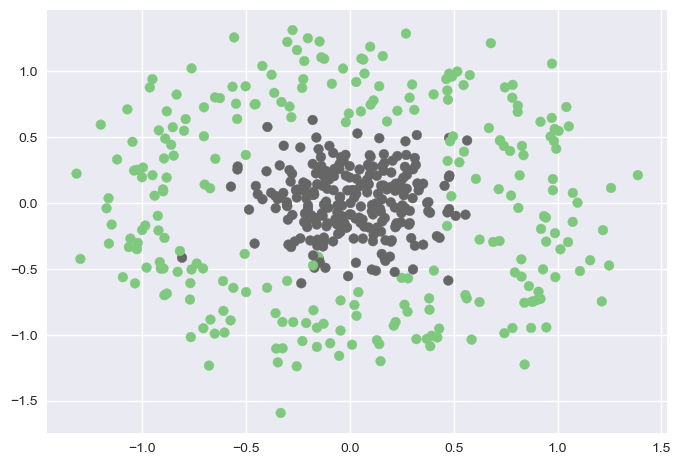

In [116]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)

In [91]:
Y_oht = nr.one_hot_vector(Y,X.shape[1])

In [143]:
nr =NeuralNetwroks(input_size=2,layers=[10,5],output_size=2)

In [105]:
nr.forward_propagation(X)

array([[0.52335135, 0.47664865],
       [0.53144257, 0.46855743],
       [0.57726974, 0.42273026],
       [0.28383524, 0.71616476],
       [0.63877346, 0.36122654],
       [0.50841174, 0.49158826],
       [0.37442957, 0.62557043],
       [0.55888858, 0.44111142],
       [0.5711453 , 0.4288547 ],
       [0.3442594 , 0.6557406 ],
       [0.49498476, 0.50501524],
       [0.4336066 , 0.5663934 ],
       [0.36449759, 0.63550241],
       [0.37609645, 0.62390355],
       [0.51318589, 0.48681411],
       [0.40138333, 0.59861667],
       [0.4729603 , 0.5270397 ],
       [0.6071061 , 0.3928939 ],
       [0.45184873, 0.54815127],
       [0.43976498, 0.56023502],
       [0.48953223, 0.51046777],
       [0.55503744, 0.44496256],
       [0.58933294, 0.41066706],
       [0.64427947, 0.35572053],
       [0.45240396, 0.54759604],
       [0.56502192, 0.43497808],
       [0.5600346 , 0.4399654 ],
       [0.47502227, 0.52497773],
       [0.41733084, 0.58266916],
       [0.70560946, 0.29439054],
       [0.

In [94]:
nr.backward_propagation(X,Y_oht)

In [95]:
nr.final()

W1 shape : (2, 10)
a1 shape : (500, 10)
W2 shape : (10, 5)
a2 shape : (500, 5)
W3 shape : (5, 2)
Y_ shape : (500, 2)


In [180]:
def train_model(X,Y,nr,epochs,lr=0.0001,logs=True):
    total_loss = []
    classes = 2
    Y_hot = nr.one_hot_vector(Y,classes)
    
    for i in range(epochs):
        Y_ = nr.forward_propagation(X)
        l = nr.loss(Y_hot,Y_)
        total_loss.append(l)
        nr.backward_propagation(X,Y_hot,lr)
    
        if logs:
            print("At epoch ",i,"loss is %.4f"%l)
    return(total_loss)

In [150]:
tl=train_model(X,Y,500)

At epoch  0 loss is 0.1594
At epoch  1 loss is 0.1444
At epoch  2 loss is 0.1351
At epoch  3 loss is 0.1295
At epoch  4 loss is 0.1260
At epoch  5 loss is 0.1238
At epoch  6 loss is 0.1224
At epoch  7 loss is 0.1214
At epoch  8 loss is 0.1207
At epoch  9 loss is 0.1202
At epoch  10 loss is 0.1198
At epoch  11 loss is 0.1195
At epoch  12 loss is 0.1192
At epoch  13 loss is 0.1190
At epoch  14 loss is 0.1188
At epoch  15 loss is 0.1185
At epoch  16 loss is 0.1183
At epoch  17 loss is 0.1181
At epoch  18 loss is 0.1179
At epoch  19 loss is 0.1177
At epoch  20 loss is 0.1175
At epoch  21 loss is 0.1174
At epoch  22 loss is 0.1172
At epoch  23 loss is 0.1170
At epoch  24 loss is 0.1168
At epoch  25 loss is 0.1166
At epoch  26 loss is 0.1165
At epoch  27 loss is 0.1163
At epoch  28 loss is 0.1161
At epoch  29 loss is 0.1159
At epoch  30 loss is 0.1158
At epoch  31 loss is 0.1156
At epoch  32 loss is 0.1154
At epoch  33 loss is 0.1153
At epoch  34 loss is 0.1151
At epoch  35 loss is 0.1149
At

At epoch  418 loss is 0.0843
At epoch  419 loss is 0.0842
At epoch  420 loss is 0.0842
At epoch  421 loss is 0.0842
At epoch  422 loss is 0.0841
At epoch  423 loss is 0.0841
At epoch  424 loss is 0.0840
At epoch  425 loss is 0.0840
At epoch  426 loss is 0.0839
At epoch  427 loss is 0.0839
At epoch  428 loss is 0.0838
At epoch  429 loss is 0.0838
At epoch  430 loss is 0.0838
At epoch  431 loss is 0.0837
At epoch  432 loss is 0.0837
At epoch  433 loss is 0.0836
At epoch  434 loss is 0.0836
At epoch  435 loss is 0.0835
At epoch  436 loss is 0.0835
At epoch  437 loss is 0.0835
At epoch  438 loss is 0.0834
At epoch  439 loss is 0.0834
At epoch  440 loss is 0.0833
At epoch  441 loss is 0.0833
At epoch  442 loss is 0.0832
At epoch  443 loss is 0.0832
At epoch  444 loss is 0.0832
At epoch  445 loss is 0.0831
At epoch  446 loss is 0.0831
At epoch  447 loss is 0.0830
At epoch  448 loss is 0.0830
At epoch  449 loss is 0.0830
At epoch  450 loss is 0.0829
At epoch  451 loss is 0.0829
At epoch  452 

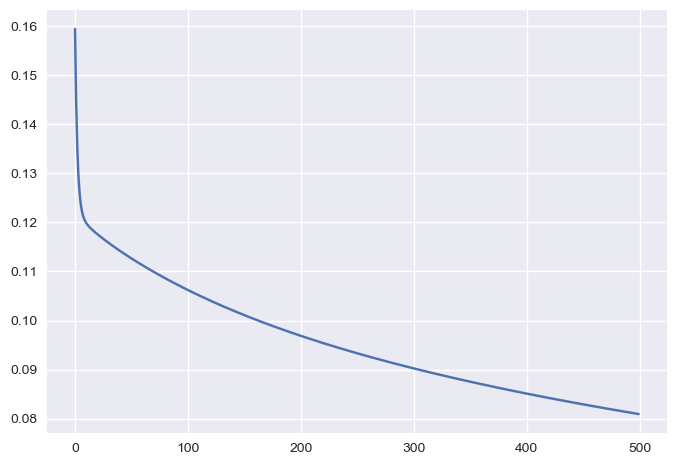

In [151]:
plt.plot(np.array(tl))

In [131]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

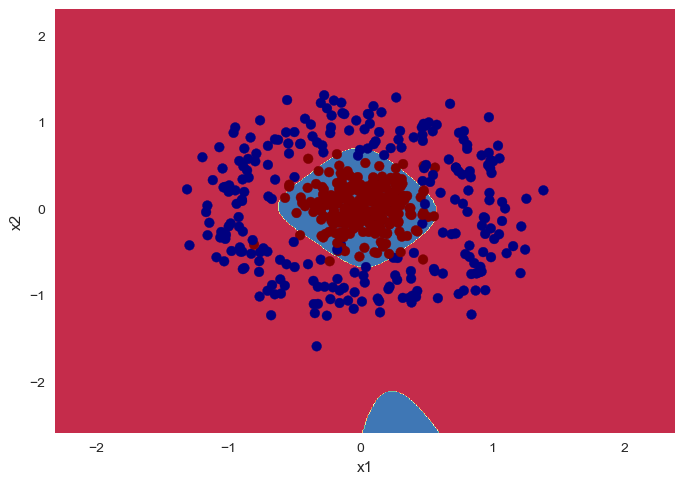

In [132]:
plot_decision_boundary(lambda x:nr.prediction(x),X,Y)

In [152]:
pred = nr.prediction(X) 

In [154]:
print(np.sum(pred==Y)/Y.shape[0])

0.964


# XOR DATA

In [155]:
XOR_X = np.array([[0,0],
        [0,1],
        [1,0],
        [1,1]])
XOR_Y = np.array([0,1,1,0])

In [164]:
loss=train_model(XOR_X,XOR_Y,100,lr=0.01)

At epoch  0 loss is 0.0832
At epoch  1 loss is 0.0681
At epoch  2 loss is 0.0579
At epoch  3 loss is 0.0506
At epoch  4 loss is 0.0451
At epoch  5 loss is 0.0409
At epoch  6 loss is 0.0376
At epoch  7 loss is 0.0349
At epoch  8 loss is 0.0327
At epoch  9 loss is 0.0308
At epoch  10 loss is 0.0292
At epoch  11 loss is 0.0278
At epoch  12 loss is 0.0266
At epoch  13 loss is 0.0256
At epoch  14 loss is 0.0247
At epoch  15 loss is 0.0238
At epoch  16 loss is 0.0231
At epoch  17 loss is 0.0224
At epoch  18 loss is 0.0218
At epoch  19 loss is 0.0212
At epoch  20 loss is 0.0207
At epoch  21 loss is 0.0202
At epoch  22 loss is 0.0198
At epoch  23 loss is 0.0193
At epoch  24 loss is 0.0189
At epoch  25 loss is 0.0186
At epoch  26 loss is 0.0182
At epoch  27 loss is 0.0179
At epoch  28 loss is 0.0176
At epoch  29 loss is 0.0173
At epoch  30 loss is 0.0170
At epoch  31 loss is 0.0168
At epoch  32 loss is 0.0165
At epoch  33 loss is 0.0163
At epoch  34 loss is 0.0161
At epoch  35 loss is 0.0158
At

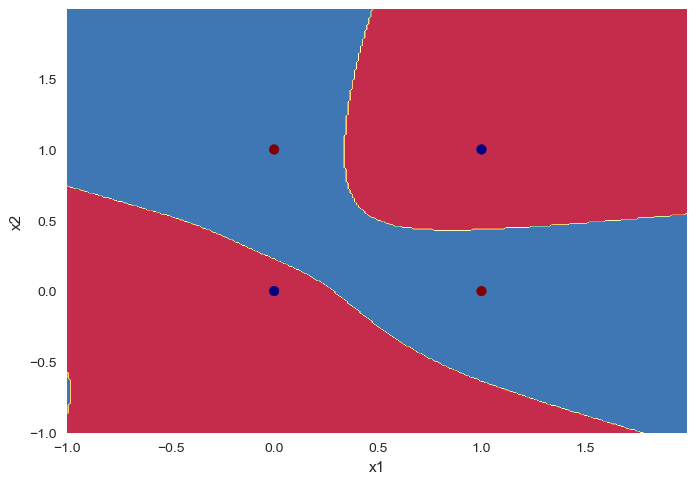

In [165]:
plot_decision_boundary(lambda x:nr.prediction(x),XOR_X,XOR_Y)

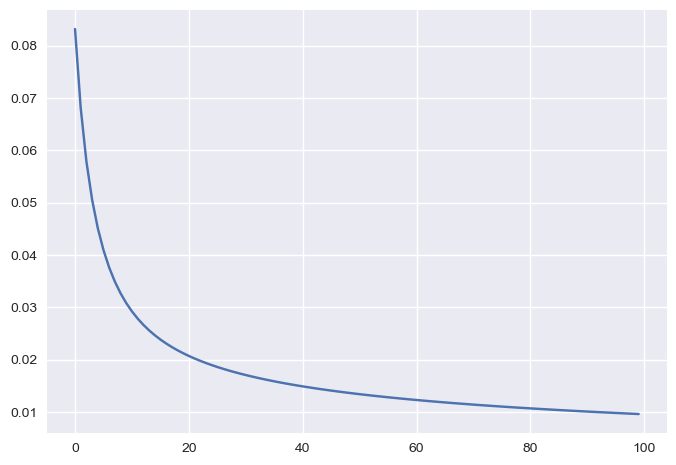

In [166]:
plt.plot(loss)

## MORE ON NEURALS

In [167]:
from sklearn.datasets import *

In [195]:
def load_data(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) 
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

Accuracy for moons  is 0.9780


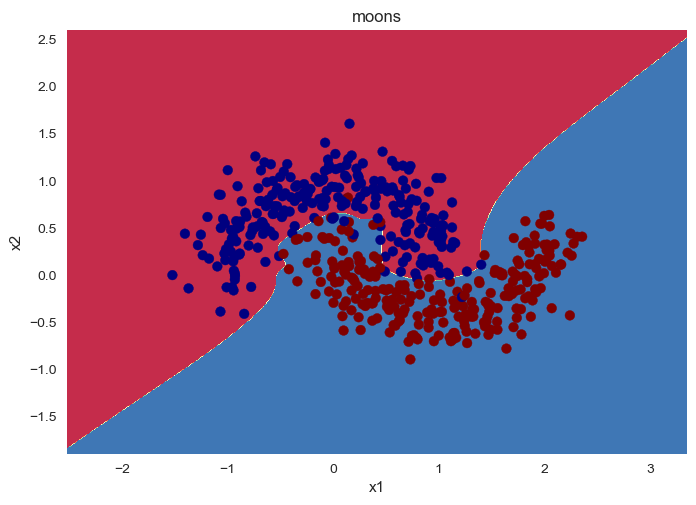

Accuracy for circles  is 0.9740


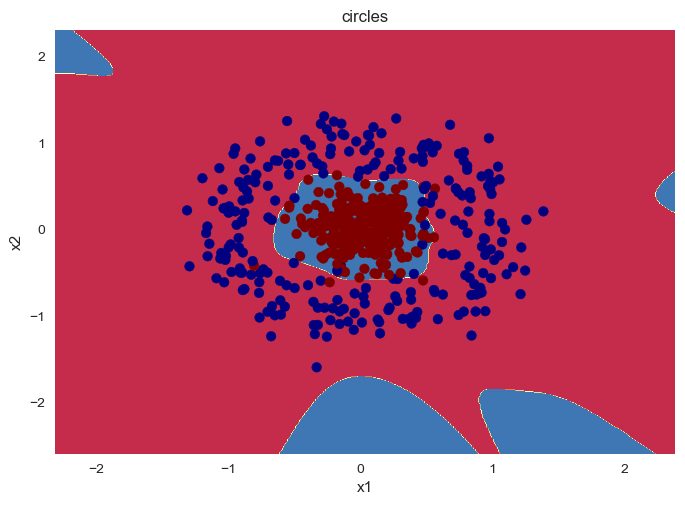

Accuracy for classification  is 0.9660


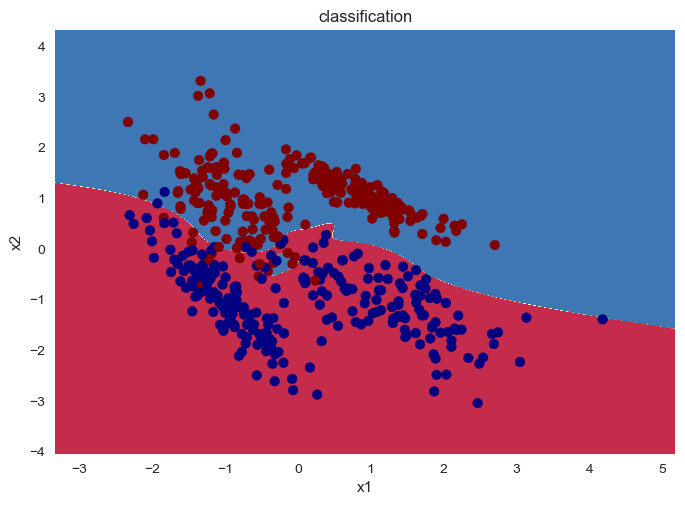

Accuracy for xor  is 1.0000


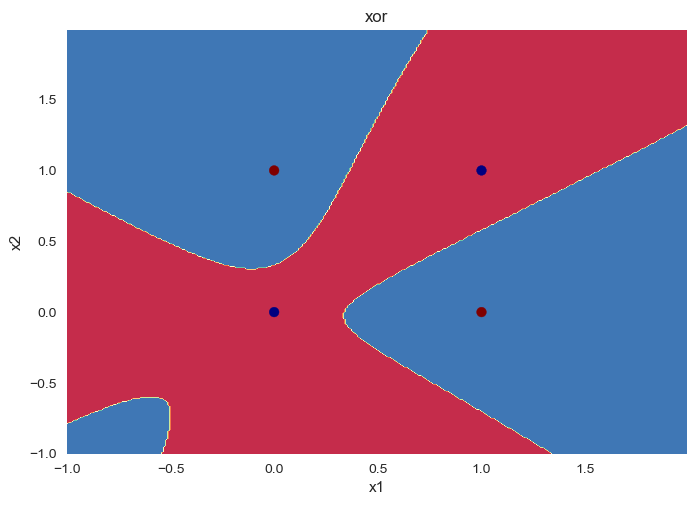

In [203]:
datasets = ["moons","circles","classification","xor"]

for dataset in datasets:
    NN = NeuralNetwroks(input_size=2,layers=[20,15],output_size=2)
    X,Y = load_data(dataset)
    loss = train_model(X,Y,NN,2000,0.001,False)
    pred = NN.prediction(X)
    print("Accuracy for",dataset," is %.4f"%(np.sum(pred==Y)/Y.shape[0]))
    plt.title(dataset)
    plot_decision_boundary(lambda x:NN.prediction(x),X,Y)
    plt.show()